In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
import numpy as np
import sklearn
print(sklearn.__version__)
from sklearn import datasets

df = pd.read_csv("./bank-additional-full.csv", delimiter = ";")
df

0.19.1


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df_dummies = pd.get_dummies(df)
del df_dummies['y_no']
del df_dummies['duration']
df_dummies['id'] = range(1, len(df_dummies) + 1)
df_dummies



,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes,id
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,1,0,0,1
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,1,0,0,2
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,1,0,0,3
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,1,0,0,0,0,1,0,0,4
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,1,0,0,5
5,45,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,1,0,0,6
6,59,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,1,0,0,0,0,1,0,0,7
7,41,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,1,0,0,8
8,24,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,1,0,0,9
9,25,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,0,0,0,1,0,0,10


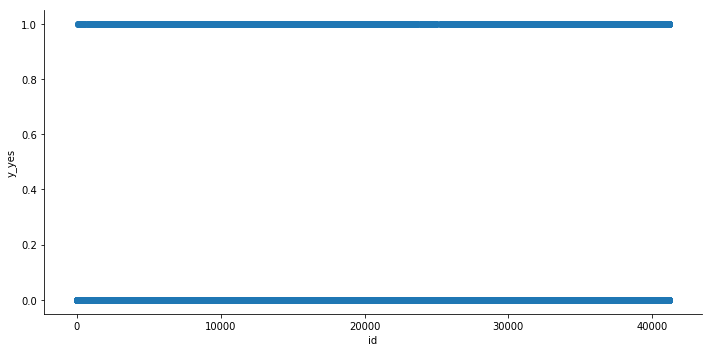

In [4]:
plot = sns.lmplot(x="id", y="y_yes", data=df_dummies, fit_reg=False, aspect=2)

In [5]:
from sklearn import svm

clf = svm.SVC(gamma=0.0001, C=100.)
outcomes_of_interest = ["y_yes"]
n_bins = 10

X_df = df_dummies.copy()
del X_df['y_yes']
X_df = X_df.values

y_df = df_dummies[outcomes_of_interest].copy()
y_df = y_df.values


clf.fit(X_df, y_df)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
        #print t
        plt.text(j, i, t,
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [10]:
y_pred = clf.predict(X_df)

In [11]:
cnf_matrix = confusion_matrix(y_df, y_pred)
np.set_printoptions(precision=2)
print(cnf_matrix)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y_df))), normalize = False,
                      title='Confusion matrix')

[[36078   470]
 [ 3268  1372]]


TypeError: unhashable type: 'numpy.ndarray'

<Figure size 432x288 with 0 Axes>

In [16]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=10)
score = cross_val_score(clf, X_df[:40], y_df[:40], cv=k_fold, n_jobs=-1)
print('Average accuracy: {} %'.format(np.mean(score)*100))

Average accuracy: 100.0 %


In [18]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


k_fold = KFold(n_splits=10)
#clf = tree.DecisionTreeClassifier(criterion = "entropy")
clf = RandomForestClassifier(n_estimators = 2000,max_depth = 4)
score_tree = cross_val_score(clf, X_df[:400],y_df[:400], cv=k_fold, n_jobs=-1)
print('Average accuracy:', np.mean(score_tree))

# Now fit the tree
 # TODO: insert code here
clf.fit(X_df,y_df)



Average accuracy: 0.9774999999999998


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

[62  8  7  2 61  4  6  5  3 60  0 49 43 52 59 42 50 53 44 33 34 17 48 14
  1 55 10 46 45 47 31 23 51 27 57 56 22 58 54 16 28 18 21 20 32  9 39 25
 30 15 36 41 38 26 11 13 19 37 12 40 24 29 35]
Feature ranking:
1. y_yes (0.187206)
2. nr.employed (0.161112)
3. euribor3m (0.130846)
4. pdays (0.098566)
5. poutcome_success (0.090453)
6. emp.var.rate (0.070811)
7. cons.conf.idx (0.063498)
8. cons.price.idx (0.046286)
9. previous (0.020777)
10. poutcome_nonexistent (0.017216)
11. age (0.017075)
12. month_mar (0.013050)
13. contact_telephone (0.011742)
14. month_oct (0.011113)
15. poutcome_failure (0.010514)
16. contact_cellular (0.010013)
17. month_may (0.007210)
18. month_sep (0.005186)
19. month_apr (0.003911)
20. default_no (0.002867)
21. default_unknown (0.002192)
22. job_student (0.002166)
23. month_jun (0.001950)
24. job_retired (0.001660)
25. campaign (0.001626)
26. day_of_week_mon (0.001572)
27. job_blue-collar (0.001568)
28. month_dec (0.000856)
29. month_aug (0.000744)
30. month_jul

ValueError: shape mismatch: objects cannot be broadcast to a single shape

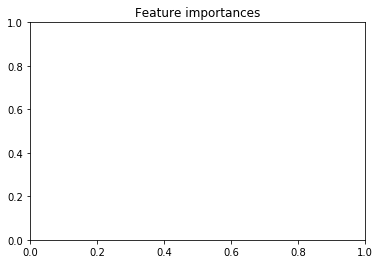

In [38]:
features=df_dummies.columns.values.tolist()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(X_df.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")  # just the top 10 features
num_feat_to_plot = 5
plt.bar(range(df_dummies.shape[1]), importances[indices[:num_feat_to_plot]],
       color="r", yerr=std[indices[:num_feat_to_plot]], align="center")
plt.xticks(range(df_dummies.shape[1]), np.array(features)[indices[:num_feat_to_plot]])
plt.xlim([-1, num_feat_to_plot])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])



In [42]:
yerr=std[indices]
